In [15]:
import pandas as pd
from google.colab import files
file = files.upload()
df = pd.read_csv("data.csv", sep=',')
df

Saving data.csv to data (1).csv


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

[6. 8. 0. 2.]
[3.91e+02 1.84e+04 0.00e+00 4.00e+00]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


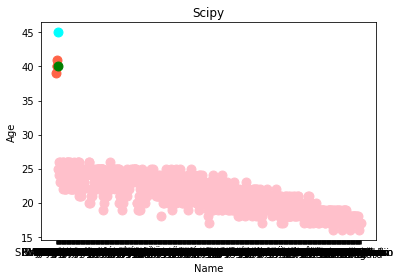

In [27]:
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import  pandas  as  pd
from  scipy.cluster.hierarchy  import  dendrogram,  linkage,  fcluster
from sklearn.cluster import AgglomerativeClustering

X  =  df.loc[:,['Age', 'Potential']]

#  матрица  расстояний
Z  =  linkage(X,  method='average',  metric='euclidean')
print(Z[0])
print(Z[199])

label  =  fcluster(Z,  6,  criterion='distance')
print(np.unique(label))
df['pred_scipy']  =  label

plt.scatter(df.loc[label==1,  'Name'],  df.loc[label==1,  'Age'],  s=80,  marker='o',  color='tomato')
plt.scatter(df.loc[label==2,  'Name'],  df.loc[label==2,  'Age'],  s=80,  marker='o',  color='cyan')
plt.scatter(df.loc[label==3,  'Name'],  df.loc[label==3,  'Age'],  s=80,  marker='o',  color='green')
plt.scatter(df.loc[label==4,  'Name'],  df.loc[label==4,  'Age'],  s=80,  marker='o',  color='pink')
plt.xlabel('Name')
plt.ylabel('Age');
plt.title('Scipy')
plt.show()

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')






[0 1 2 3 4 5 6]


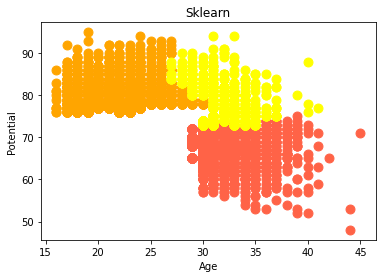

In [28]:
#Метод Sklearn
y_hc = hc.fit_predict(X)
print(np.unique(y_hc))
X['pred_sklearn'] = y_hc


plt.scatter(X.loc[y_hc==0, 'Age'], X.loc[y_hc==0, 'Potential'], s=80, marker='o', color='tomato')
plt.scatter(X.loc[y_hc==1, 'Age'], X.loc[y_hc==1, 'Potential'], s=80, marker='o', color='orange')
plt.scatter(X.loc[y_hc==2, 'Age'], X.loc[y_hc==2, 'Potential'], s=80, marker='o', color='yellow')
plt.xlabel('Age')
plt.ylabel('Potential');
plt.title('Sklearn')

plt.show()

'\n На дендрограмме видна последовательность объединения объектов или разделения. По оси х расположены индексы объектов, по оси у растояние между кластерами объектов. На дендрограмме ~7 кластеров.\n'

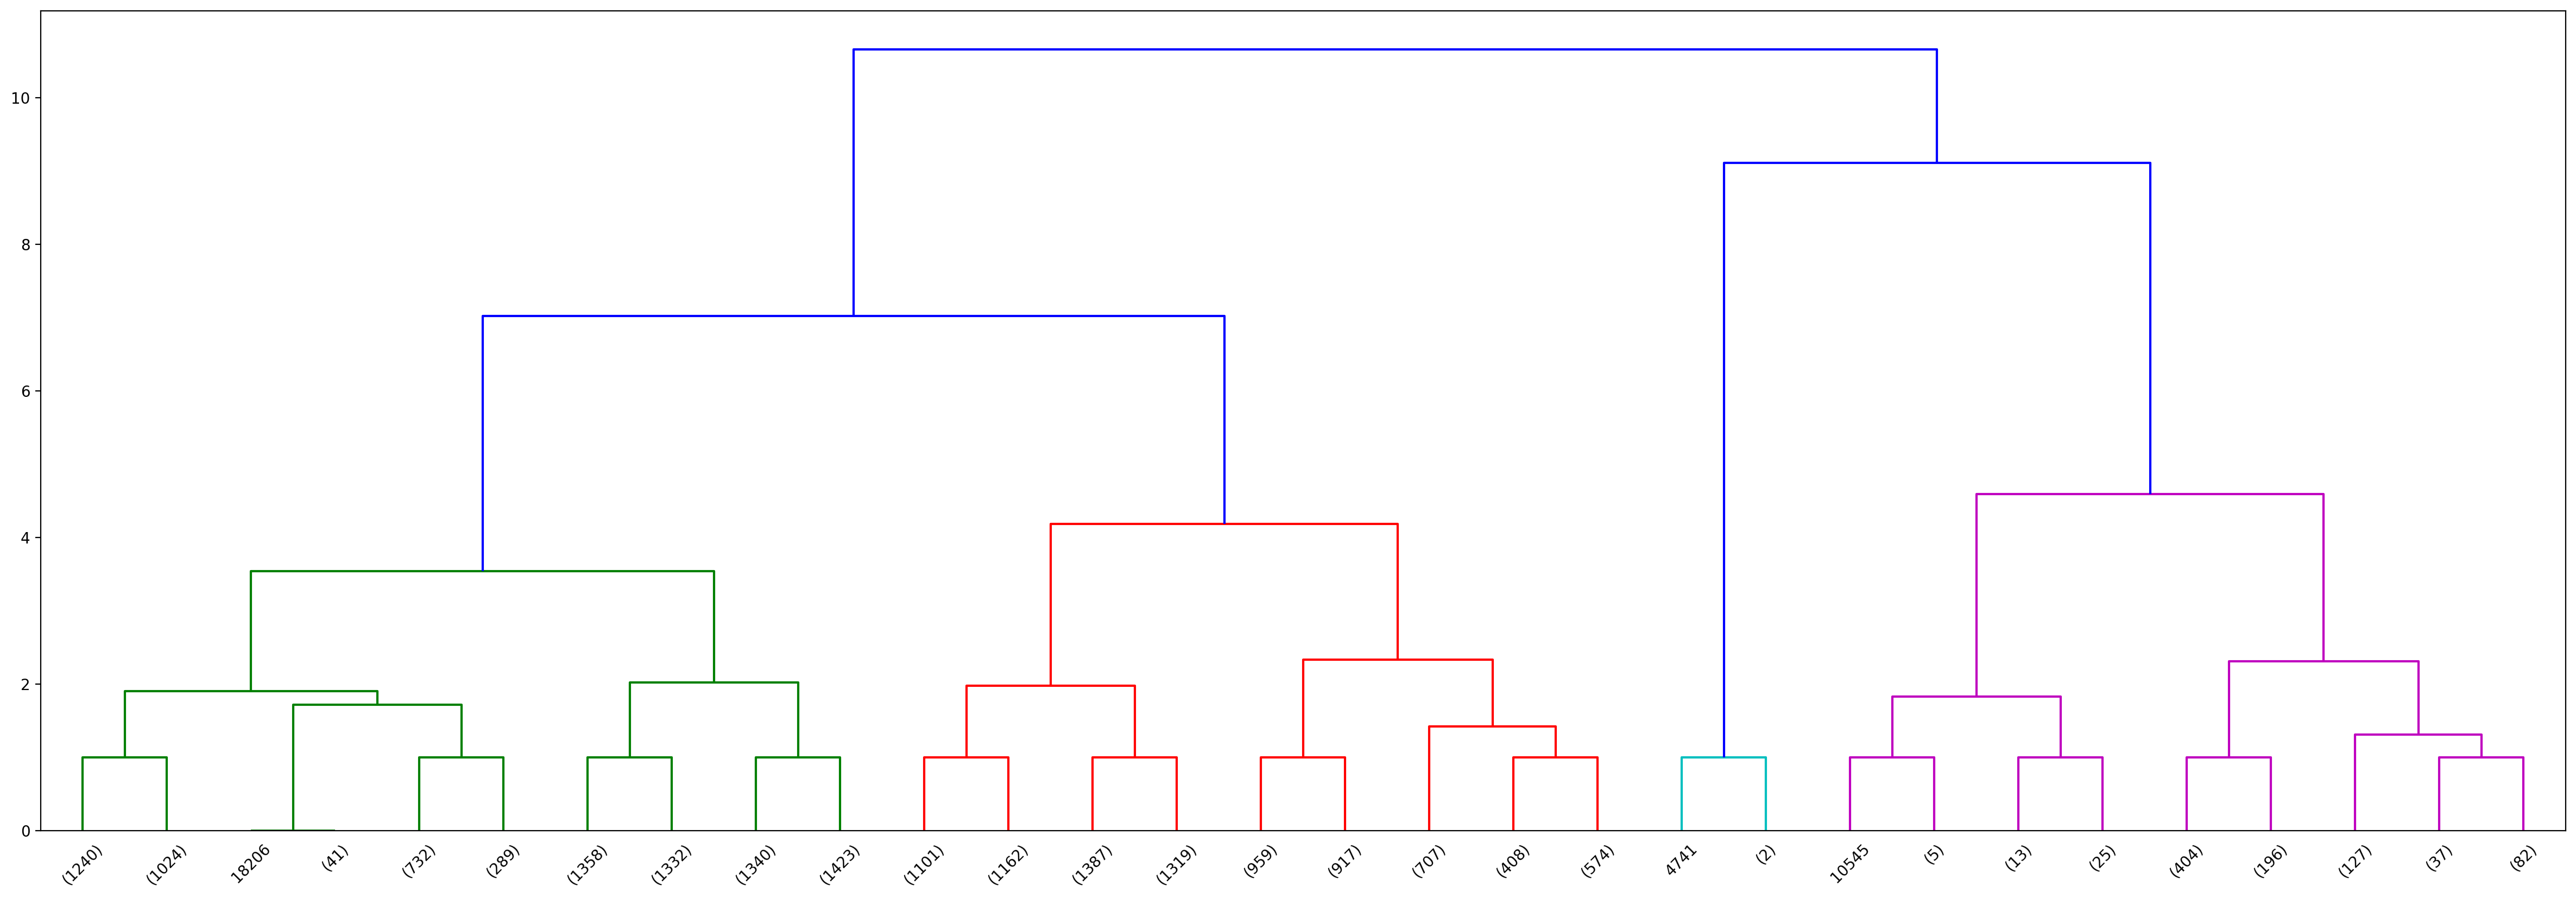

In [22]:
fig  =  plt.figure(1,figsize=(30,  10),dpi=200)
dn  =  dendrogram(Z,truncate_mode='lastp',color_threshold=7)

'''
 На дендрограмме видна последовательность объединения объектов или разделения. По оси х расположены индексы объектов, по оси у растояние между кластерами объектов. На дендрограмме ~7 кластеров.
'''